<a href="https://colab.research.google.com/github/DanaeMartinez01/Metodos-Numericos-/blob/main/PILS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio de interpolación de Lagrange:
   3                  
7⋅x       2   29⋅x    
──── - 5⋅x  + ──── + 1
 6             6      


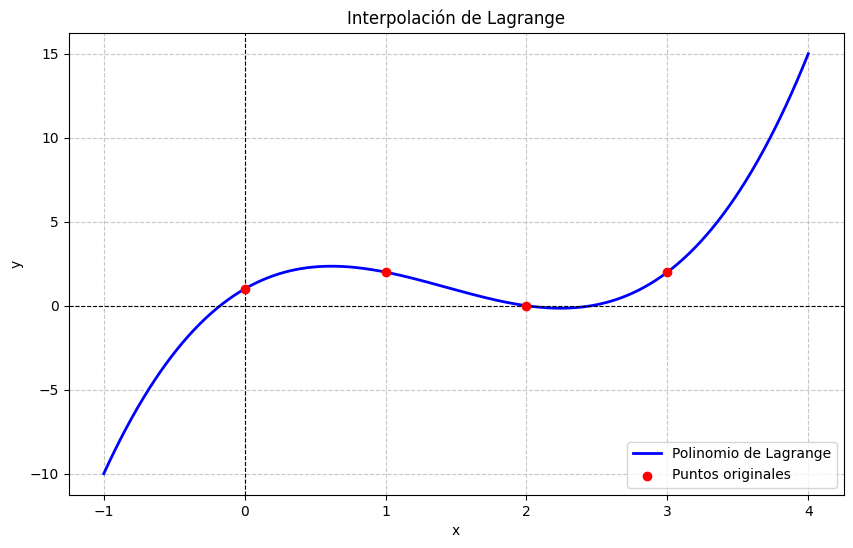

In [1]:
# Importar las bibliotecas necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x_values, y_values):
    """
    Función que calcula el polinomio de interpolación de Lagrange
    para un conjunto dado de puntos.

    Parámetros:
        x_values: Lista de valores de x (nodos).
        y_values: Lista de valores de y (f(x)).

    Retorno:
        P(x): Polinomio de interpolación de Lagrange en forma simbólica.
    """
    # Verificar que las listas de entrada tengan el mismo tamaño
    if len(x_values) != len(y_values):
        raise ValueError("Las listas de x_values e y_values deben tener el mismo tamaño.")

    # Definir la variable simbólica
    x = sp.symbols('x')
    n = len(x_values)  # Número de puntos
    P = 0  # Inicializar el polinomio como 0

    # Construir el polinomio de Lagrange
    for i in range(n):
        # Calcular L_i(x), el i-ésimo término de Lagrange
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - x_values[j]) / (x_values[i] - x_values[j])
        # Sumar el término correspondiente al polinomio
        P += y_values[i] * L_i

    # Simplificar el polinomio
    P = sp.simplify(P)
    return P

def plot_lagrange(x_values, y_values, P):
    """
    Función que grafica el polinomio de interpolación de Lagrange
    junto con los puntos originales.

    Parámetros:
        x_values: Lista de valores de x (nodos).
        y_values: Lista de valores de y (f(x)).
        P: Polinomio de interpolación en forma simbólica.
    """
    # Convertir el polinomio simbólico en una función evaluable
    P_func = sp.lambdify(sp.symbols('x'), P, 'numpy')

    # Crear un rango de valores para graficar el polinomio
    x_plot = np.linspace(min(x_values) - 1, max(x_values) + 1, 500)
    y_plot = P_func(x_plot)

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, label="Polinomio de Lagrange", color="blue", linewidth=2)
    plt.scatter(x_values, y_values, color="red", label="Puntos originales", zorder=5)
    plt.title("Interpolación de Lagrange")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

# Ejemplo de uso
# Definir los puntos (x, y)
x_vals = [0, 1, 2, 3]
y_vals = [1, 2, 0, 2]

# Calcular el polinomio de interpolación de Lagrange
polinomio = lagrange_interpolation(x_vals, y_vals)

# Mostrar el polinomio
print("Polinomio de interpolación de Lagrange:")
sp.pprint(polinomio)

# Graficar el polinomio junto con los puntos
plot_lagrange(x_vals, y_vals, polinomio)

Descripción del código

  1.	Cálculo del polinomio de Lagrange:
	•	Se construye el polinomio  P(x)  iterando sobre los nodos y calculando los términos  L_i(x)  correspondientes.

  •	La biblioteca sympy permite trabajar de manera simbólica, facilitando la manipulación y simplificación de expresiones.

2.	Gráfica:
	•	El polinomio simbólico se convierte a una función evaluable con lambdify.

  •	Se grafican el polinomio y los puntos originales con matplotlib. Los puntos se resaltan en rojo, y el polinomio en azul.

  3.	Ejemplo:
	•	Se proporciona un conjunto de datos ejemplo para demostrar el funcionamiento.